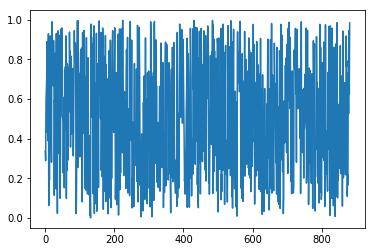

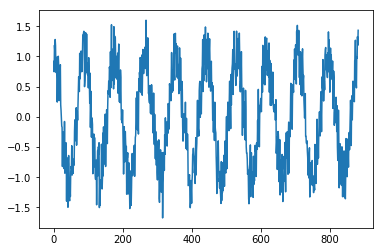

In [62]:
import numpy as np
from scipy.io import wavfile
import math as m
import matplotlib.pyplot as plt

def sinusoid(freq, amp=1., dur=1, fs=1000):
    '''
    Function to generate a sinusoid
    Parameters:
        freq: the desired frequency of the sinusoid
        amp: the amplitude of the sinusoid. Default is 1
        dur: the duration of the sinusoid in seconds. Default is 1 second
        fs: the sampling frequency desired to generate the sinusoid. Default is 1000
    Return:
        y: a numpy array of the sinusoide
        time: a numpy array of the time steps used in generation of the sinusoid
    '''
    n = fs*dur
    #Generate a time array for all these time steps
    time = np.linspace(0,dur,int(n))

    #Let's normalize our time so 1 second represents 1 cylce around a circle, or 2pi.
    time_norm = 2*m.pi*time

    #We don't need a for loop to calculate the sin at every time step. With np.sin, it can calculate the 
    #sin of every element in the array
    y = amp*np.sin(freq*time_norm)
    
    #Return our sinusoid and the time steps we used
    return y, time

def write_wavfile(filename,fs,data):
    d = np.int16(data/np.max(np.abs(data)) * 32767 * 0.9)
    wavfile.write(filename, int(fs), d)
    
def reqshift(data,fshift=100,sample_rate=4096):
    """Frequency shift the signal by constant
    """
    x = np.fft.rfft(data)
    T = len(data)/float(sample_rate)
    df = 1.0/T
    nbins = int(fshift/df)
    # print T,df,nbins,x.real.shape
    y = np.roll(x.real,nbins) + 1j*np.roll(x.imag,nbins)
    y[0:nbins]=0.
    z = np.fft.irfft(y)
    return z


fs = 44100
OriginalChirp, time = sinusoid(500, amp=.002, dur=.02, fs=fs)
OriginalChirp = OriginalChirp + np.random.rand(len(OriginalChirp))

plt.plot(OriginalChirp)
plt.show()

Chirp = reqshift(OriginalChirp, fshift=500, sample_rate=fs)
plt.plot(Chirp)
plt.show()

write_wavfile('OriginalChirp.wav', fs, Chirp)

In [59]:
fna = 'OriginalChirp.wav'
from IPython.display import Audio
Audio(fna)